Osnabrück University - A&C: Computational Cognition (Summer Term 2019)

# Exercise Sheet 04: Analysis of behavioural data (part 2)

## Introduction

This week's sheet should be solved and handed in at 14:00 at **Tuesday, May 14, 2019**. If you need help (and Google and other resources were not enough), feel free to contact your tutors. Please push your results to your Github group folder.

In this exercise sheet we will have a closer look on the data of Seahaven using analysing techniques like ANOVA, linear regression models and t-tests. For the correct results we will provide you with the finalized data that you only have to read in. Note that especially the data for assignment 2 and 3 underwent some further preprocesing than what we did in the previous exercise.

## Assignment 0: Peer review for sheet 03 [3 pts]

Open an issue in the repository of the groups you have to check. The title of the issue should be your group name (e.g. "Group1). Comment on what was good and what was bad, the aesthetics and ease of reading the plots, what you would have done differently and how many points you would give them for their solutions.

| * |Group 1|Group 2|Group 3|Group 4|Group 5|Group 6|Group 7|Group 8|Group 9|Group 10|Group 11|
| ------- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ------ | ------ |
| check solutions of group: | 6, 2 | 10, 7  | 1, 6  | 8, 9 | 7, 1 | 9, 8 | 3, 10  | 5, 11  | 4, 3  | 11, 5 | 2, 4  |

Please also evaluate nice coding style with up to two points.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ptitprince as pt
import seaborn as sns
sns.set()
from PIL import Image
from scipy import stats
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.api import anova_lm
from statsmodels.formula.api import ols

## Assignment 1: Linear Regression Model Based on Performance and Reaction Time [2 pts]

Although the linear regression in the prior exercise sheet (assignment 2.a) does not suggest a relationship between RT and performance (accuracy) for the relative task, we still want to check how much of the performance is explained by the RT. To do so we fit a linear regression model by using the ```ols``` method in the ```statsmodels``` library for both of the time conditions (3sec and Infinite).

- Read ```AllData.csv``` into the dataframe ```AllData``` and take only the data of the relative task. 
- Split the data of the relative task: Create ```SecData``` with the data of the 3sec-condition and ```InfData``` with the data of the Infinite-condition.
- For each dataset (SecData, InfData) use the ```statsmodels```’ ```ols``` function to initialise a simple linear regression model. <br> The ```ols``` function takes the following: **ols("y ~ X", df)**, where X is the predictor variable ("ReactionTime"), y is the output variable ("Performance") and df is the dataframe of the used data.
- Have a look on the R-squared values and interpret them.

Take a look at the [ols documentation](https://www.statsmodels.org/stable/index.html) and the [patsy documentation](https://patsy.readthedocs.io/en/v0.1.0/formulas.html) to get a feeling how to use the function.

In [2]:
PATH = os.getcwd()+ "/Data/AllData.csv"
        
df_all = pd.read_csv(PATH)

# pd.set_option for display
pd.set_option('precision', 4)
pd.set_option('max_rows', 20)

# filter for relative task and time conditions
SecData = df_all[(df_all['Task'] == 'Relative') & (df_all['Time'] == '3sec')]
InfData = df_all[(df_all['Task'] == 'Relative') & (df_all['Time'] == 'Infinite')]

# fit a simple linear regression model to both data sets
SecResults = ols('Performance ~ ReactionTime', data=SecData).fit()
InfResults = ols('Performance ~ ReactionTime', data=InfData).fit()

# print the regression results for both time conditions
print("3sec-condition results:")
print(SecResults.summary())
print()
print("Inf-condition results:")
print(InfResults.summary())

3sec-condition results:
                            OLS Regression Results                            
Dep. Variable:            Performance   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     4.195
Date:                Sat, 11 May 2019   Prob (F-statistic):             0.0433
Time:                        17:38:48   Log-Likelihood:                 78.822
No. Observations:                  97   AIC:                            -153.6
Df Residuals:                      95   BIC:                            -148.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4099 

**The R^2 values obtained by using an OLS regression model to investigate the impact of the reaction time on the performance of the subjects show that for the 3sec time condition, reaction time explains only around 4% of the variance in performance. For the infinite time condition this effect is stronger. Here the reaction time accounts for almost 12% in the variance of the performance. The adjusted R^2 values are not significantly different. All in all reaction time only explains a very small part of the variance in the performance in both time conditons.**

## Assignment 2: Testing Task Performance via ANOVA [5 pts]

For this assignment we will have a look on the whole data without caring about the different measurements.

### a) Task Performance [2 pts]

Refering to our plots of the prior exercise sheet (assignment 2.b), it is a good idea to have a closer look on the task performance (accuracy) to check if there are some **significant effects, i.e. p < 0.05**. To do so we will first of all visualize the data with a raincloud-plot using ```ptitprince.RainCloud``` as a density estimate and then calculate the ANOVAs. Make sure to run ```pip install ptitprince``` in your activated acc environment beforehand.

- Read ```MapPerformances.csv``` into the dataframe ```AllPerformances```.
- Make a RainCloud-plot of the tasks (x-axis) and performance (y-axis) for both time conditions (3sec / Infinite). The y-axis should start at 0.25 and end at 0.75.
- Have a look at ```help(pt.RainCloud)``` to get an overview of the different parameters that you can modify to create a nice raincloud-plot.

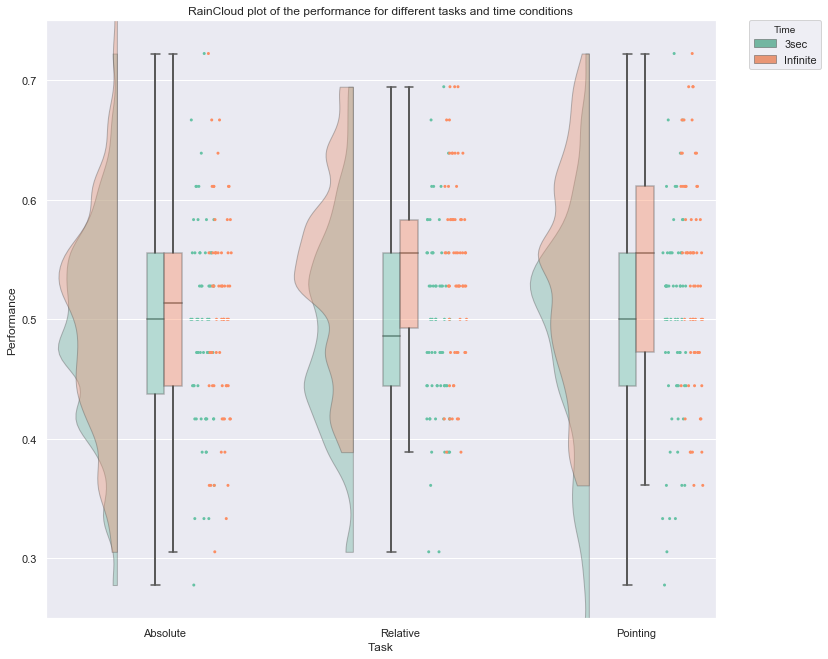

In [4]:
# get the path to the MapPerformances
PERFPATH = os.getcwd()+ "/Data/MapPerformances.csv"
# read the csv file into a data frame
AllPerformances = pd.read_csv(PERFPATH)

# create raincloud plot
ax = pt.RainCloud(x='Task', y='Performance', hue='Time', data=AllPerformances, move=0.2, dodge=True, width_viol =0.5, 
                  alpha=0.4)

# set plot title and y-axis
ax.set(title="RainCloud plot of the performance for different tasks and time conditions", ylim=[0.25, 0.75]);

Using the data of ```AllPerformances``` we now want to calculate a **two-way ANOVA**. A two-way ANOVA is a statistical test used to determine the effect of two nominal predictor variables (= independent variables) on a continuous outcome variable (= dependent variable).

H$_{01}$ = The performance is the same for the different tasks. <br>
H$_{02}$ = The performance is the same for the different time conditions. <br>
H$_{03}$ = An interaction effect does not exist.

- Given the null hypotheses above, what is the outcome variable and what are the predictor variables that you have to use for the two-way ANOVA?
- Use ```statsmodels```’ ```ols``` function to create an ordinary least squares model as a precursor to the ANOVA. <br> The ```ols``` function takes the following: **ols("y ~ C(X1) * C(X2)", df)**, where X1 and X2 are the predictor variables, y is the output variable and df is the dataframe of the used data.
- With the result of the ols calculate a **type 2** two-way ANOVA using ```statsmodels```’ ```anova_lm```.
- Based on the ANOVA table explain which of the null hypotheses can be rejected. What does this outcome tell you?

Take a look at the [ols documentation](https://www.statsmodels.org/stable/index.html), the [patsy documentation](https://patsy.readthedocs.io/en/v0.1.0/formulas.html) and the [anova_lm documentation](http://www.statsmodels.org/dev/anova.html) to get a feeling how to use these functions.

In [5]:
# create ols model for two-way ANOVA
# we investigate the impact of the task and the time condition (independent variables) 
# on the performance (dependent variable)
model = ols('Performance ~ C(Task)*C(Time)', AllPerformances).fit()

# perform two-way ANOVA
ano = anova_lm(model, typ= 2)
ano

,sum_sq,df,F,PR(>F)
C(Task),0.0207,2.0,1.3231,2.6753e-01
C(Time),0.1465,1.0,18.6896,1.9699e-05
C(Task):C(Time),0.0275,2.0,1.7544,1.7442e-01
Residual,2.9627,378.0,NaN,NaN


**The p-values in the last column of the ANOVA results table indicate that we should reject H$_{02}$ while retaining the null hypothesis in the other two cases. Only for H$_{02}$ is the p-value smaller than our standard \alpha of 0.05. This indicates that performance is not the same for the two time conditions, instead there is a significant difference between the performance in the two conditions. The different tasks however do not significantly influence the performance and there is also no interaction between the variables Task and Time.**

### b) Task Performance: 3sec Condition vs. Infinite Condition [3 pts]

Let's take a closer look onto the single time conditions by calculating a **one-way ANOVA** for each time condition (3sec and Infinite). A one-way ANOVA is a statistical test used to determine the effect of one nominal predictor variable (= independent variable) on a continuous outcome variable (= dependent variable). 

H$_{01}$ = The performance is the same for the different tasks. <br>

- Use the data of ```AllPerformances``` and split it: Create ```SecPerformances``` with the data of the 3sec-condition and ```InfPerformances``` with the data of the Infinite-condition.
- Given the null hypothesis above, what is the outcome variable and what is the predictor variable that you have to use for the one-way ANOVAs?

Do for each dataset (SecPerformances, InfPerformances):

- Use ```statsmodels```’ ```ols``` function to create an ordinary least squares model as a precursor to the ANOVA. The ```ols``` function takes the formula <br> The ```ols``` function takes the following: **ols("y ~ C(X)", df)**, where X is the predictor variable, y is the output variable and df is the dataframe of the used data.
- With the result of the ols calculate a **type 1** one-way ANOVA using ```statsmodels```’ ```anova_lm```.
- Based on the ANOVA table explain if the null hypothesis can be rejected. What does this outcome tell you?

Take a look at the [ols documentation](https://www.statsmodels.org/stable/index.html) and the [patsy documentation](https://patsy.readthedocs.io/en/v0.1.0/formulas.html) to get a feeling how to use this function.

In [6]:
# split AllPerformances into SecPerformances and  InfPerformances
SecPerformances = AllPerformances[AllPerformances["Time"] == "3sec"]
InfPerformances = AllPerformances[AllPerformances["Time"] == "Infinite"]

# create ols models
# the outcome variable is 'Performance' once again, while the predictor variable is 'Task'
SecModel = ols("Performance ~ C(Task)", SecPerformances).fit()
InfModel = ols("Performance ~ C(Task)", InfPerformances).fit()

# perform one-way ANOVA for both time conditions
AnoSec = anova_lm(SecModel, typ=1)
AnoInf = anova_lm(InfModel, typ=1)
# print the ANOVA results
print("3sec contdition:")
print(AnoSec)
print()
print("Infinite time condition:")
print(AnoInf)

3sec contdition:
             df  sum_sq  mean_sq       F  PR(>F)
C(Task)     2.0  0.0006   0.0003  0.0394  0.9614
Residual  189.0  1.5244   0.0081     NaN     NaN

Infinite time condition:
             df  sum_sq  mean_sq      F  PR(>F)
C(Task)     2.0  0.0476   0.0238  3.128  0.0461
Residual  189.0  1.4382   0.0076    NaN     NaN


**The ANOVA table printed above indicate that we have to reject the null hypothesis for the infinite time condition but not for the 3sec time condition. This tells us that for the infinite time condition the performance is not the same for all three tasks, instead there exist significant differences. For the 3sec condition the performance is not significantly different for the different tasks.** 

If there is a significant outcome for one of the datasets (SecPerformances or InfPerformances), make a post-hoc paired t-test using this dataset.

- Extract the performances for each task (Absolute, Relative, Pointing).
- Compare the performances of the different tasks pairwise using ```scipy.stats.ttest_rel```
- Why do we need to do further post-hoc tests and what do they tell us?

In [7]:
# Extract performances for each task
AbsPerf = InfPerformances[InfPerformances["Task"] == "Absolute"]["Performance"]
RelPerf = InfPerformances[InfPerformances["Task"] == "Relative"]["Performance"]
PtgPerf = InfPerformances[InfPerformances["Task"] == "Pointing"]["Performance"]
# print the reults of the paired t-tests for all three possible combinations
print("Absolute - Relative: "+str(stats.ttest_rel(AbsPerf, RelPerf)))
print("Absolute - Pointing: "+str(stats.ttest_rel(AbsPerf, PtgPerf)))
print("Relative - Pointing: "+str(stats.ttest_rel(RelPerf, PtgPerf)))

Absolute - Relative: Ttest_relResult(statistic=-2.549420177654396, pvalue=0.013236758937606112)
Absolute - Pointing: Ttest_relResult(statistic=-1.8697272275281769, pvalue=0.06617015143684292)
Relative - Pointing: Ttest_relResult(statistic=0.38334190525937933, pvalue=0.702756818654483)


**The t-tests show that there is a significant difference in the average performance for the Absolute task when compared witht the Relative task. In the other two cases there is no significant difference between the average performance for the different tasks, although the effect is almost significant when comparing the Absolute and the Pointing task. The t-tests allow us to identify for which task(s) in the Infinite time condition the performance differes significantly from the performance in the other task(s).**

## Assignment 3: Testing Task Performance via Repeated Measures ANOVA [3 pts]

Now we want to take a closer look on the task performance (accuracy) also taking the different measurements into account to check if there are some **significant effects, i.e. p < 0.05**. For this purpose we have the averaged performances over 15 repeated measure subjects for three measurements. We will first of all visualize the averaged performances for each task for the three measurements with a catplot and then calculate a repeated measures ANOVA. 

- Read ```RepeatedPerformances.csv``` into the dataframe ```RepeatedPerformances```.
- Make a catplot (kind='barplot') of the conditions (x-axis) and the performance (y-axis). The y-axis should start at 0 and end at 0.75.
- Please note that the conditions in the dataframe correspond to the given "conditions" list.

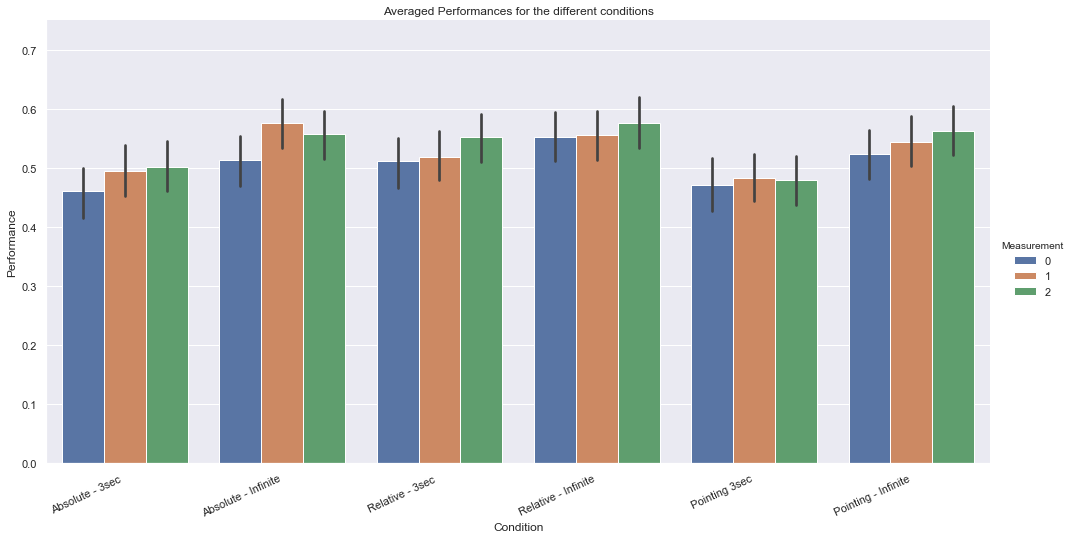

In [183]:
conditions = ["Absolute - 3sec ","Absolute - Infinite","Relative - 3sec ",
              "Relative - Infinite","Pointing 3sec","Pointing - Infinite"]

# read RepeatedPerformances.csv and store it as data frame
REPPATH = os.getcwd()+ "/Data/RepeatedPerformances.csv"
        
RepeatedPerformances = pd.read_csv(REPPATH)

# create catplot and set axis and title, also rotate xticklabels for better readability
ax = sns.catplot(x='Condition', y='Performance', hue='Measurement', data=RepeatedPerformances,
                 kind='bar', height=7, aspect=2)
ax.set(title= "Averaged Performances for the different conditions", ylim=[0, 0.75]);
ax.set_xticklabels(conditions, rotation=25, ha="right");

In [184]:
# create a usable dataframe for the following analysis
repgroup = RepeatedPerformances.groupby(['Measurement','Subject','Condition'], as_index=False)['Performance'].mean()

RepeatedDf = pd.DataFrame(columns={'Measurement','Subject','Task','Time','Performance'})
tasks = ['Absolute','Absolute','Relative','Relative','Pointing','Pointing']
times = ['3sec','Infinite','3sec','Infinite','3sec','Infinite']
for i in range(270):
    RepeatedDf = RepeatedDf.append({'Subject':repgroup['Subject'][i],'Measurement':repgroup['Measurement'][i],'Task':tasks[repgroup['Condition'][i]],'Time':times[repgroup['Condition'][i]],'Performance':repgroup['Performance'][i]},ignore_index=True)
RepeatedDf

,Measurement,Performance,Time,Subject,Task
0,0,0.444444,3sec,0,Absolute
1,0,0.611111,Infinite,0,Absolute
2,0,0.527778,3sec,0,Relative
3,0,0.527778,Infinite,0,Relative
4,0,0.361111,3sec,0,Pointing
5,0,0.444444,Infinite,0,Pointing
6,0,0.333333,3sec,2,Absolute
7,0,0.555556,Infinite,2,Absolute
8,0,0.611111,3sec,2,Relative
9,0,0.555556,Infinite,2,Relative


Using the data of ```RepeatedDf``` we want to calculate a **(three-way) repeated measures ANOVA**. A (three-way) repeated measures ANOVA in general is a statistical test used to determine the effect of three nominal predictor variables (= within-subject factors) on a continuous outcome variable (= dependent variable). 



- What is the dependent variable and what are the within-subject factors that you have to use for the repeated measures ANOVA?
- Formulate the null hypotheses that the repeated measures ANOVA has to test.
- Calculate a repeated measures ANOVA using ```statsmodels```' ```AnovaRM```. 
- Based on the ANOVA table explain which of the null hypotheses can be rejected. What does this outcome tell you?

Take a look at the [ANOVARM documentation](http://www.statsmodels.org/dev/generated/statsmodels.stats.anova.AnovaRM.html#statsmodels.stats.anova.AnovaRM) to get a feeling how to use this function.

**Null hypotheses:**<br>
H$_{01}$ = The performance is the same for the different time conditions.<br>
H$_{02}$ = The performance is the same for different measurements.<br>
H$_{02}$ = The performance is the same for different tasks.<br>
H$_{04}$ = An interaction effect does not exist between any of the within-subject factors.

In [10]:
# perform three-way repeated measures ANOVA on RepeatedDf
# the dependent variable is once again (as always in this notebook...) the performance
# the within-subject factors are Time codnition, number of Measurement and the different Tasks
anorm = AnovaRM(data=RepeatedDf, depvar="Performance", subject="Subject", within=["Time", "Measurement", "Task"]).fit()
# print the ANOVA results
anorm.summary()

,Num DF,Den DF,F Value,Pr > F
Time,1.0000,14.0000,19.4550,0.0006
Measurement,2.0000,28.0000,2.5727,0.0943
Task,2.0000,28.0000,1.8458,0.1766
Time:Measurement,2.0000,28.0000,0.0726,0.9301
Time:Task,2.0000,28.0000,0.6688,0.5203
Measurement:Task,4.0000,56.0000,0.5986,0.6652
Time:Measurement:Task,4.0000,56.0000,0.2483,0.9095


**Based on the ANOVA table above we only reject H$_{02}$. There is in fact a significant difference in performance for the different time conditions. This is consistent with previous results in this notebook. All the other within-subject factors as well as any combination of them do not significantly affect the subjects performance.**

## Assignment 4: Spatial coverage of Seahaven [Bonus]

To get a better feeling of the spatial coverage of Seahaven, we can create an overview of the houses that the subjects have seen. With a colormap it is easy to display the spatial coverage in an intuitive way.

- Open the image ```map5.png``` as ```SeahavenMap``` and read ```Clicks.csv``` into a dataframe ```NumClicks```.
- Draw a solid circle for each house. Use the x- and y-coordinates of ```NumClicks``` for the positioning of the circles.
- The column "clicks" from ```NumClicks``` displays how many subjects had visited the respective house. Use these click-values to calculate each circle's colour:

$CircleColor = cmap((click[i]-min(clicks))/(max(clicks)-min(clicks)))$

$clicks$: list/array of all click-values from the dataframe ```NumClicks``` <br>
$click[i]$: a certain click-value from the dataframe ```NumClicks``` at position $i$

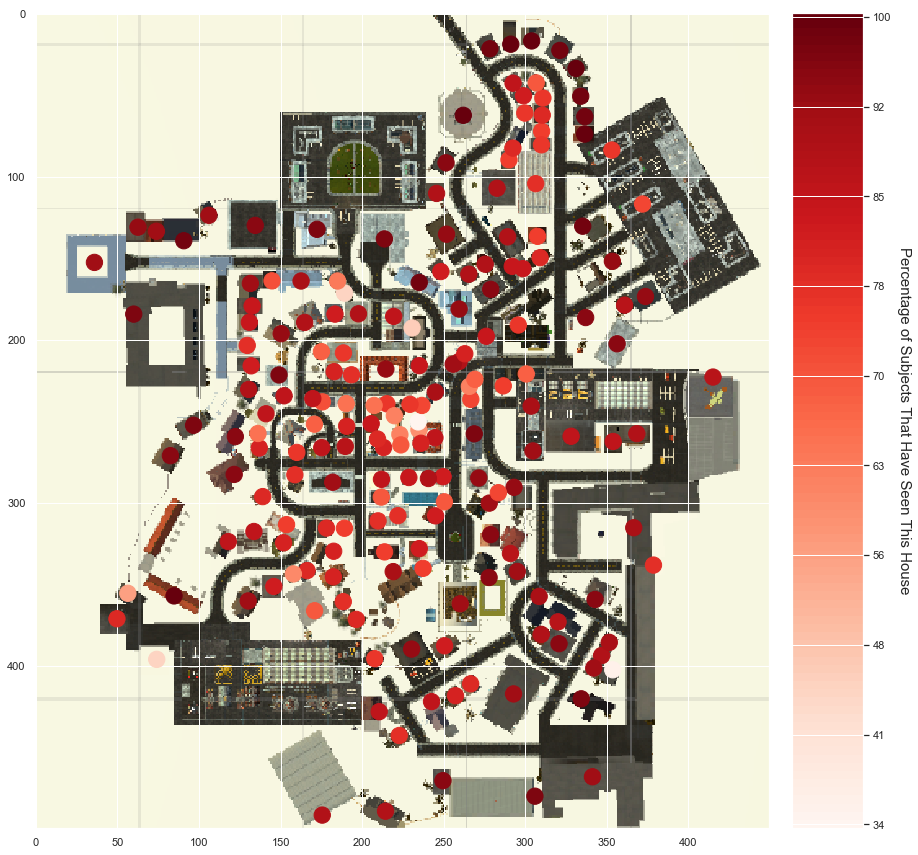

In [20]:
# import circles to draw on the image
from matplotlib.patches import Circle

# open the files and extract the necessary data
CLICKPATH = os.getcwd() + "/Data/Clicks.csv"
IMGPATH = os.getcwd() + "/Data/map5.png"

SeahavenMap = Image.open(IMGPATH)
NumClicks = pd.read_csv(CLICKPATH)
# add CircleColor column to NumClicks
NumClicks["CircleColor"] = (NumClicks.clicks - NumClicks.clicks.min())/(NumClicks.clicks.max() - NumClicks.clicks.min())

# set everything up to display the Seahaven Map
fig = plt.figure(figsize=(15,15))
SeahavenMap = SeahavenMap.resize((450,500))
ax = plt.subplot2grid((10, 10), (0, 0), colspan=9,rowspan=10)
plt.imshow(SeahavenMap, aspect = 'equal')

# choose a colormap for the circles that display the houses
cmap = plt.cm.get_cmap('Reds')

# draw the circles and give them the right color (using the given colormap)
for xx,yy,c in zip(NumClicks["x"],NumClicks["y"],NumClicks["CircleColor"]):
    circ = Circle((xx,yy),5, color=cmap(c))
    ax.add_patch(circ)


# set everything up to display the Colormap / legend for the circle's colors
a=np.outer(np.arange(0,1,0.01),np.ones(3))
ax2 = plt.subplot2grid((10, 10), (0, 9),rowspan=10)
plt.imshow(a,aspect='auto',cmap='Reds',origin="lower")
ax2.get_xaxis().set_ticks([])
ax2.get_yaxis().set_ticks(np.linspace(0,99,10))
ax2.get_yaxis().set_ticklabels(np.linspace((min(NumClicks.clicks)/64)*100,(max(NumClicks.clicks)/64)*100,10,dtype=int))
ax2.yaxis.tick_right()
ax2.set_ylabel("Percentage of Subjects That Have Seen This House",rotation=270, fontsize=15, labelpad=20)
ax2.yaxis.set_label_position("right")
plt.show()